In [1]:
library(ggplot2)
library(Seurat)
library(plyr)
library(dplyr)
library(Matrix)
library(cowplot)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
aggr.data <- Read10X("GFP_day7_CR6_no_norm/filtered_feature_bc_matrix")

genes.seurat <- CreateSeuratObject(aggr.data, min.cells = 10, min.features = 200, project = "GFP_day7")
remove(aggr.data)

genes.seurat[["percent.mt"]] <- PercentageFeatureSet(genes.seurat, pattern = "^mt-")

experiment <- sub(".*-(.*)","\\1", colnames(genes.seurat))
experiment <- plyr::mapvalues(experiment,
                              from = as.character(c(1, 2)),
                              to = c("Sham", "MI-day 7"))
names(experiment) = colnames(genes.seurat)
table(experiment)
genes.seurat <- AddMetaData(genes.seurat, experiment, col.name = "Condition")

genes.seurat@meta.data$Condition <- factor(genes.seurat@meta.data$Condition,
                                           levels = c("Sham", "MI-day 7"))

experiment
MI-day 7     Sham 
    7034     6320 

Plot some QC metrics

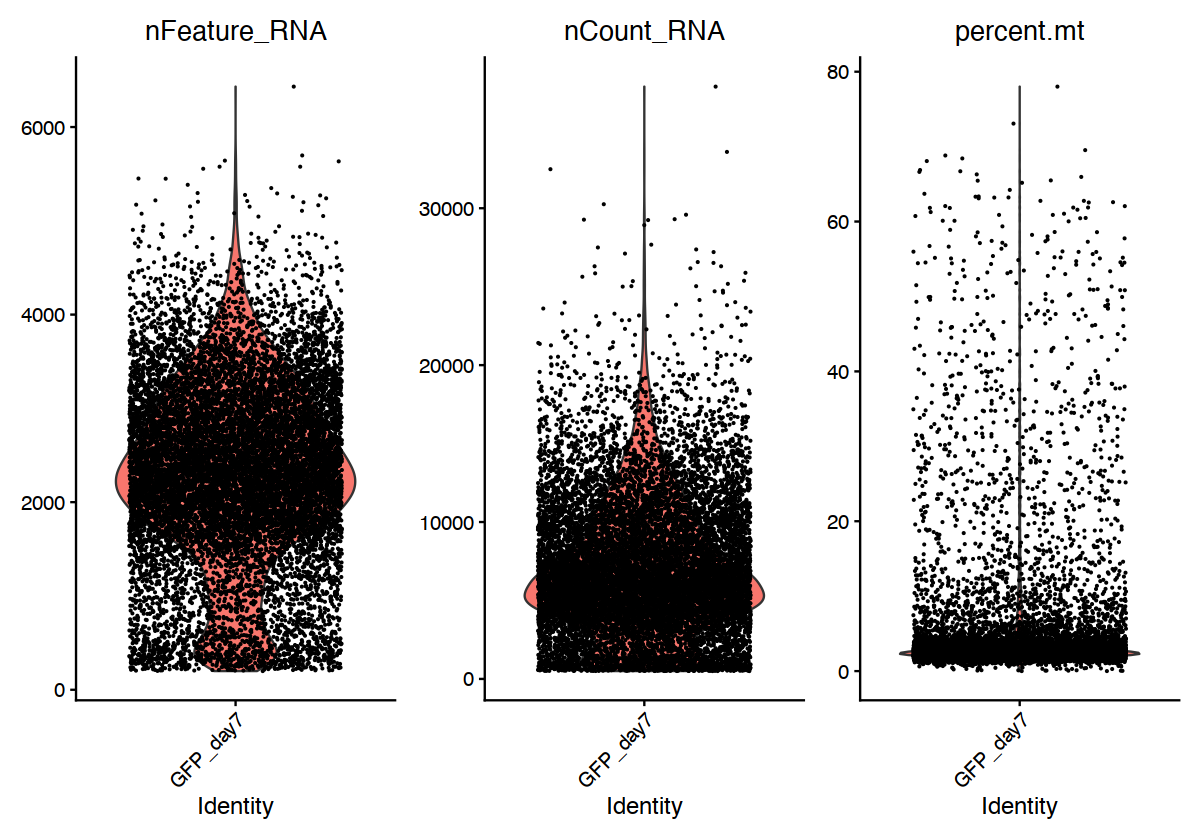

In [3]:
#Violin plot of QC metrics
options(repr.plot.width=10, repr.plot.height=7)
VlnPlot(genes.seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

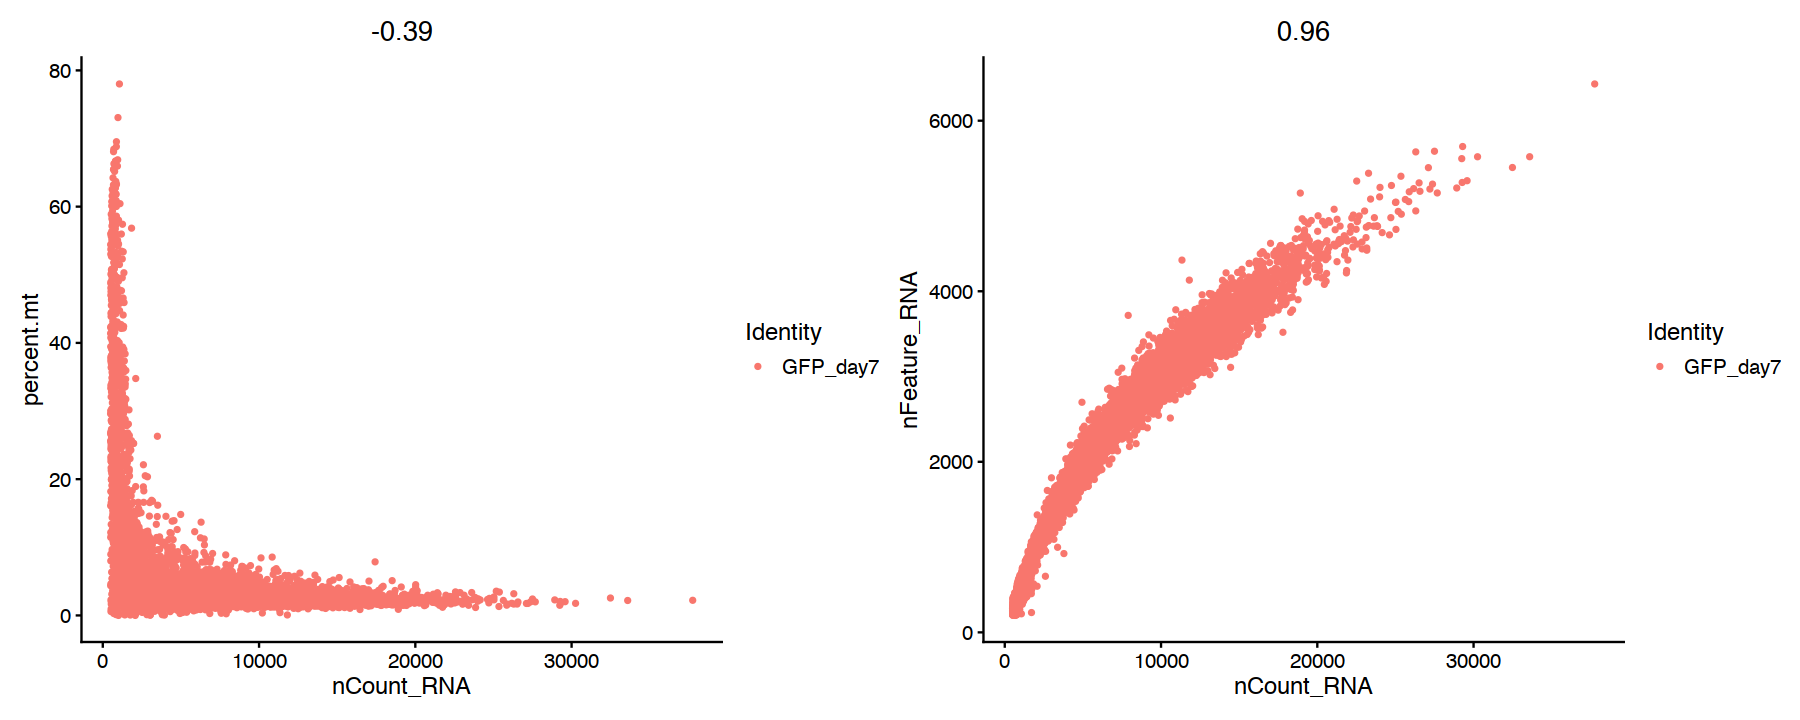

In [4]:
options(repr.plot.width=15, repr.plot.height=6)
plot1 <- FeatureScatter(genes.seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(genes.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [5]:
genes.seurat <- NormalizeData(object = genes.seurat,
                              normalization.method = "LogNormalize",
                              scale.factor = 10000)

# Find higly variable genes
genes.seurat <- FindVariableFeatures(object = genes.seurat, mean.function = "vst", nfeatures = 2000)

# Regress of unwanted variation
genes.seurat <- ScaleData(genes.seurat,  verbose = TRUE)

genes.seurat <- RunPCA(object = genes.seurat, features = VariableFeatures(object = genes.seurat), npcs=25)

## Clustering
genes.seurat <- FindNeighbors(genes.seurat, dims = 1:25)
genes.seurat <- FindClusters(genes.seurat, resolution = 0.6)

### UMAP/t-SNE analysis
genes.seurat <- RunUMAP(genes.seurat, dims = 1:25)

Centering and scaling data matrix

PC_ 1 
Positive:  Gsn, Clec3b, Gstm1, Dpep1, Tnxb, Smoc2, Adamts5, G0s2, Hsd11b1, Gsta3 
	   Lpl, Vwa1, Mgst1, Selenbp1, Jund, Scara5, Enpp2, Camk2n1, Pcsk6, Pla1a 
	   Glul, Ces1d, Ifi205, Cebpd, Pi16, Pgf, Igfbp6, Apoe, Gas1, Phlda1 
Negative:  Cthrc1, Postn, Fn1, Lox, Ddah1, Col1a2, Col5a2, Csrp2, Col1a1, Ltbp2 
	   Rflnb, Col3a1, Ccn4, Palld, Actn1, Mfap4, Ecrg4, Sparc, Tagln, Timp1 
	   Ptn, Col8a1, Sfrp2, Cd200, Tgfb3, Col14a1, Fstl1, Marcksl1, Ppic, Col16a1 
PC_ 2 
Positive:  Sfrp2, Gucy1a1, Ecrg4, Gm26771, Cthrc1, Ptn, Col8a2, Comp, Matn4, Eln 
	   Pdlim3, Thbs2, Lox, Fmod, Mdk, Kif26b, Ddah1, Kcnj15, Ccn5, Fn1 
	   Col1a1, Gxylt2, Col11a1, Palld, Cdh2, Adarb1, Dnm3os, Nox4, Col16a1, Ltbp2 
Negative:  Cdca3, Birc5, Cdca8, Tpx2, Mki67, Ccnb2, Stmn1, Ccna2, Cenpa, Hmmr 
	   Cdc20, Cenpf, Cks2, Pclaf, Knstrn, Cenpm, Racgap1, Pimreg, Ckap2, Ckap2l 
	   Cdkn3, Spc24, Kif20a, Nuf2, Kif22, Pbk, Ccnb1, Tacc3, Tk1, Kif23 
PC_ 3 
Positive:  Birc5, Cdca3

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13354
Number of edges: 439320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8308
Number of communities: 11
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:55:47 UMAP embedding parameters a = 0.9922 b = 1.112

16:55:47 Read 13354 rows and found 25 numeric columns

16:55:47 Using Annoy for neighbor search, n_neighbors = 30

16:55:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:55:48 Writing NN index file to temp file /var/folders/2p/fzztw4ls58lcjyzm918ky5900000gn/T//RtmphnMYHa/file16e19c8f7d6

16:55:48 Searching Annoy index using 1 thread, search_k = 3000

16:55:50 Annoy recall = 100%

16:55:50 Commencing smooth kNN distance calibrat

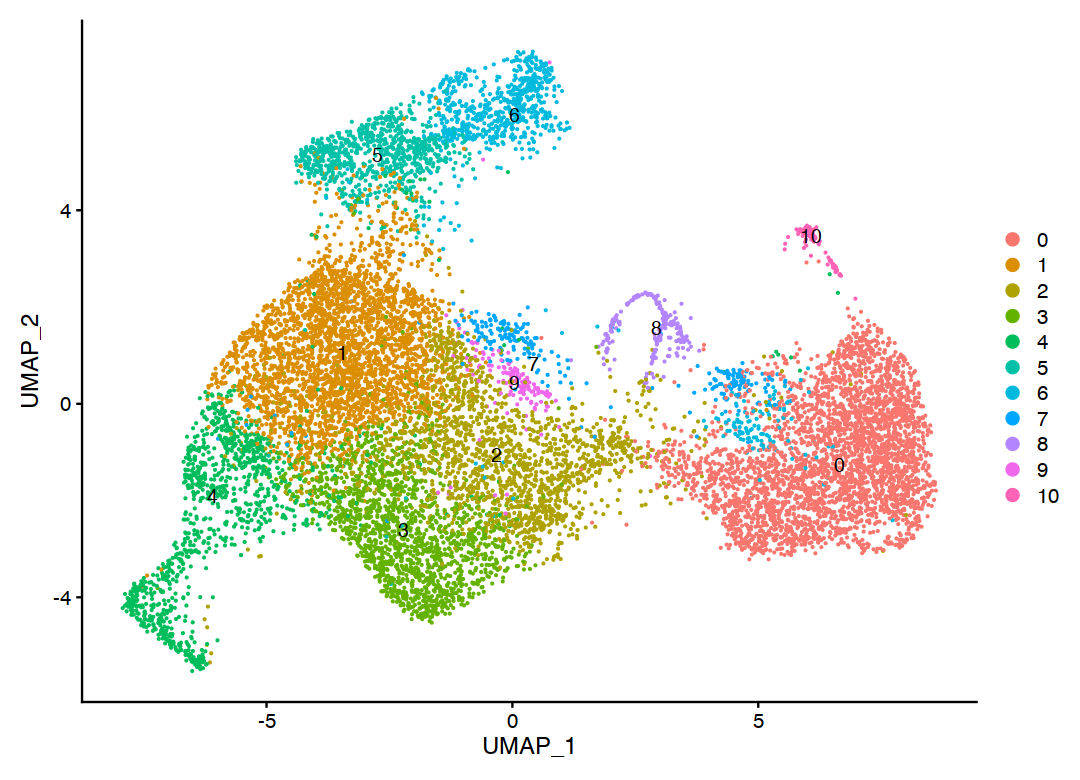

In [6]:
options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(genes.seurat, reduction = "umap", label = TRUE)

# Doublet filtering

Visualise and filter doublets identified with Scrublet

[1] 13525

[1] 24

[1] 13330


Doublet Singlet 
     24   13330 

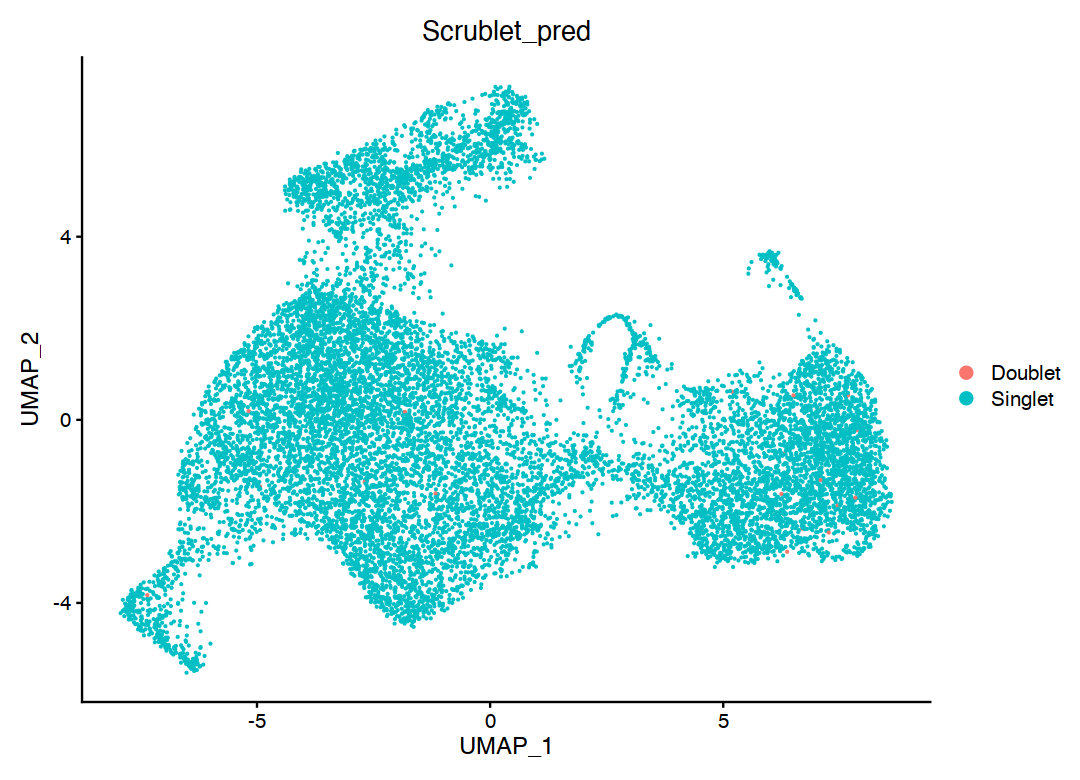

In [7]:
singlet.files <- c("Scrublet/Sham_singlets.txt",
                   "Scrublet/MI_singlets.txt")

all.singlets <- c()
for (this.file in singlet.files) {
  singlets <- readLines(this.file)
  all.singlets <- append(all.singlets, singlets)
}
length(all.singlets)
length(setdiff(colnames(genes.seurat), all.singlets))
length(intersect(colnames(genes.seurat), all.singlets))

scrublet.doublet <- ifelse(colnames(genes.seurat) %in% all.singlets, "Singlet", "Doublet")
genes.seurat@meta.data$Scrublet_pred <- scrublet.doublet
table(genes.seurat$Scrublet_pred)

options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(genes.seurat, group.by = "Scrublet_pred")


In [8]:
genes.seurat <- subset(genes.seurat, Scrublet_pred == "Singlet")
print(dim(genes.seurat))

[1] 15576 13330


# Assign cell identities from original clustering

In [9]:
gfp.day7.data <- read.csv("GFP_day7_filtered_Farbehi_etal_metadata.csv",
                          stringsAsFactors = FALSE, row.names = 1)
head( gfp.day7.data )

overlapping.cells <- intersect(colnames(genes.seurat), rownames(gfp.day7.data))
gfp.day7.data <- gfp.day7.data[overlapping.cells, ]

genes.seurat <- genes.seurat[, overlapping.cells]

cluster.ids <- gfp.day7.data$Original_clusters
names(cluster.ids) <- rownames(gfp.day7.data)

genes.seurat$Original_clusters <- cluster.ids
Idents(genes.seurat) <- genes.seurat$Original_clusters

,orig.ident,percent.mito,res.0.6,res.0.8,res.1,res.1.2,tree.ident,nCount_RNA,nFeature_RNA,Condition,Original_clusters
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
AAACCTGAGTGCCATT-1,Day7,0.02401747,0,0,0,1,4,6412,2390,Uninjured,F-SL
AAACCTGTCAACACCA-1,Day7,0.02655511,0,0,0,1,4,8247,2812,Uninjured,F-SL
AAACCTGTCCACTCCA-1,Day7,0.02955083,0,1,1,7,4,5922,2333,Uninjured,F-SL
AAACGGGCACAAGCCC-1,Day7,0.02306273,4,5,7,7,4,5420,2050,Uninjured,F-SL
AAACGGGCACGTAAGG-1,Day7,0.01339286,0,0,3,4,4,1792,951,Uninjured,F-SL
AAACGGGGTAGGGACT-1,Day7,0.02075392,0,0,0,7,4,4722,1761,Uninjured,F-SL


# Generate updated UMAP plot

In [10]:
# Normalise data
genes.seurat <- NormalizeData(object = genes.seurat,
                              normalization.method = "LogNormalize",
                              scale.factor = 10000)

# Find higly variable genes
genes.seurat <- FindVariableFeatures(object = genes.seurat, mean.function = "vst", nfeatures = 2000)

# Regress of unwanted variation
genes.seurat <- ScaleData(genes.seurat,
                          vars.to.regress = c("nCount_RNA"),
                          verbose = TRUE)
#genes.seurat <- ScaleData(genes.seurat, vars.to.regress = c("nCount_RNA", "percent.mt"), verbose = TRUE)

genes.seurat <- RunPCA(object = genes.seurat, features = VariableFeatures(object = genes.seurat), npcs=50)

### UMAP/t-SNE analysis
genes.seurat <- RunUMAP(genes.seurat,
                        n.neighbors = 30,
                        dims = 1:30,
                        min.dist = 0.25,
                        seed.use = 10)

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Gsn, Gstm1, Clec3b, Cd34, Htra3, Tnxb, Smoc2, Dpep1, Sparcl1, Adamts5 
	   Pi16, Pla1a, Vwa1, Camk2n1, S100a10, Selenbp1, Ly6a, Igfbp6, Scara5, Pcolce2 
	   Jund, Tuba1b, Ramp2, Gsta3, Mgst1, Pcsk6, G0s2, Atf5, Efhd1, Tppp3 
Negative:  Cthrc1, Lox, Ddah1, Fn1, Col1a2, Col1a1, Postn, Col5a2, Ltbp2, Col3a1 
	   Rflnb, Palld, Ecrg4, Csrp2, Ccn4, Ptn, Sfrp2, Mfap4, Actn1, Cd200 
	   Col16a1, Mdk, Ccn2, Col8a2, Tgfb3, Marcksl1, Runx1, Sparc, Fmod, Comp 
PC_ 2 
Positive:  Htra3, Fbln1, Ogn, Clec3b, Jund, Gsn, Dpep1, Gstm1, Cst3, Mgst1 
	   Crispld2, Lum, Apoe, Ecm1, Selenbp1, Ccdc80, C3, Timp3, Meg3, Cebpd 
	   Gas6, Tnxb, Igfbp6, Eln, Camk2n1, Dusp1, Ramp2, Glul, Mgp, Plpp3 
Negative:  Birc5, Cdca3, Mki67, Tpx2, Cdca8, Ccnb2, Stmn1, Ccna2, Hmmr, Cks2 
	   Cenpf, Racgap1, Cenpa, Pclaf, Pimreg, Ckap2, Knstrn, Cdc20, Ckap2l, Spc24 
	   Cenpm, Kif20a, Nuf2, Cdkn3, Kif22, Kif23, Ccnb1, Pbk, Depdc1a, Tk1 
PC_ 3 
Posit

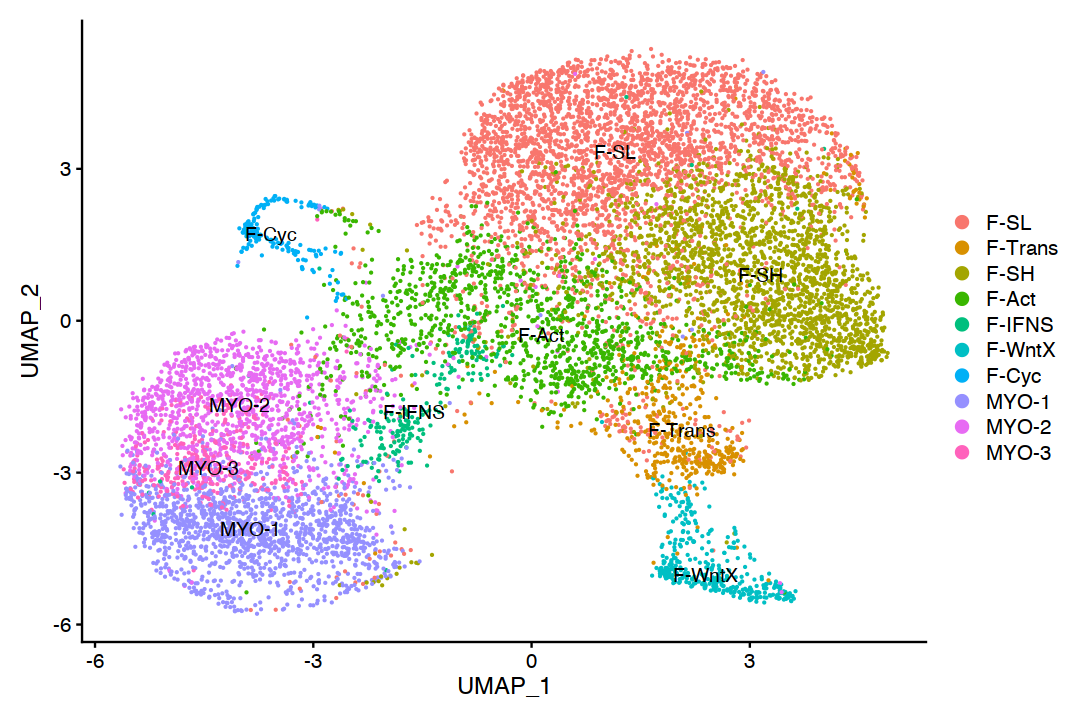

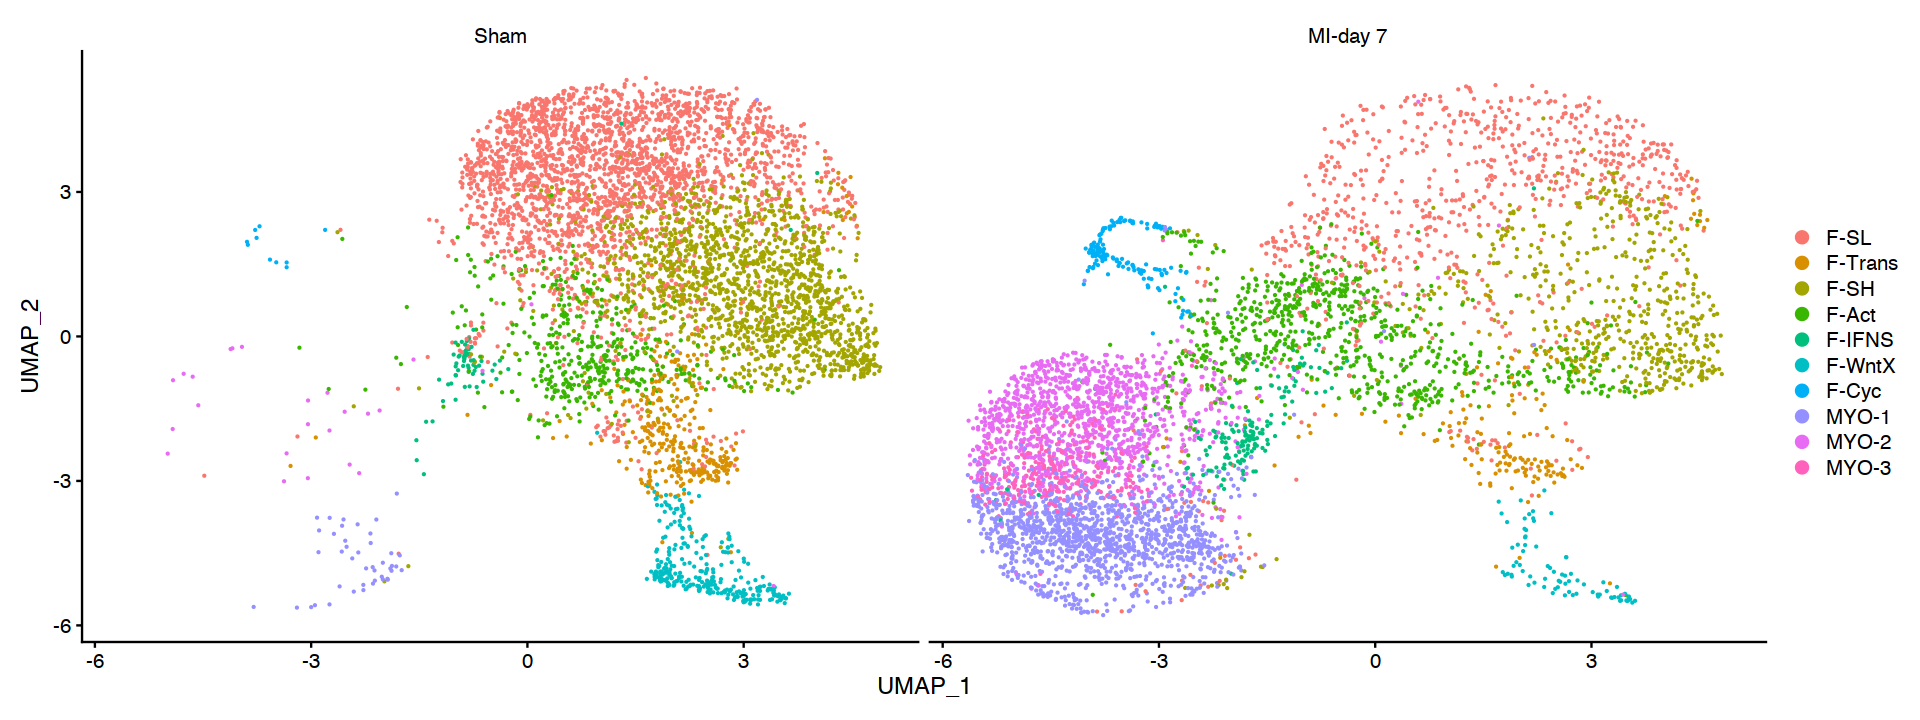

In [11]:
options(repr.plot.width=9, repr.plot.height=6)
DimPlot(genes.seurat, reduction = "umap", label = TRUE) 
options(repr.plot.width=16, repr.plot.height=6)
DimPlot(genes.seurat, reduction = "umap", split.by = "Condition", ncol=2)

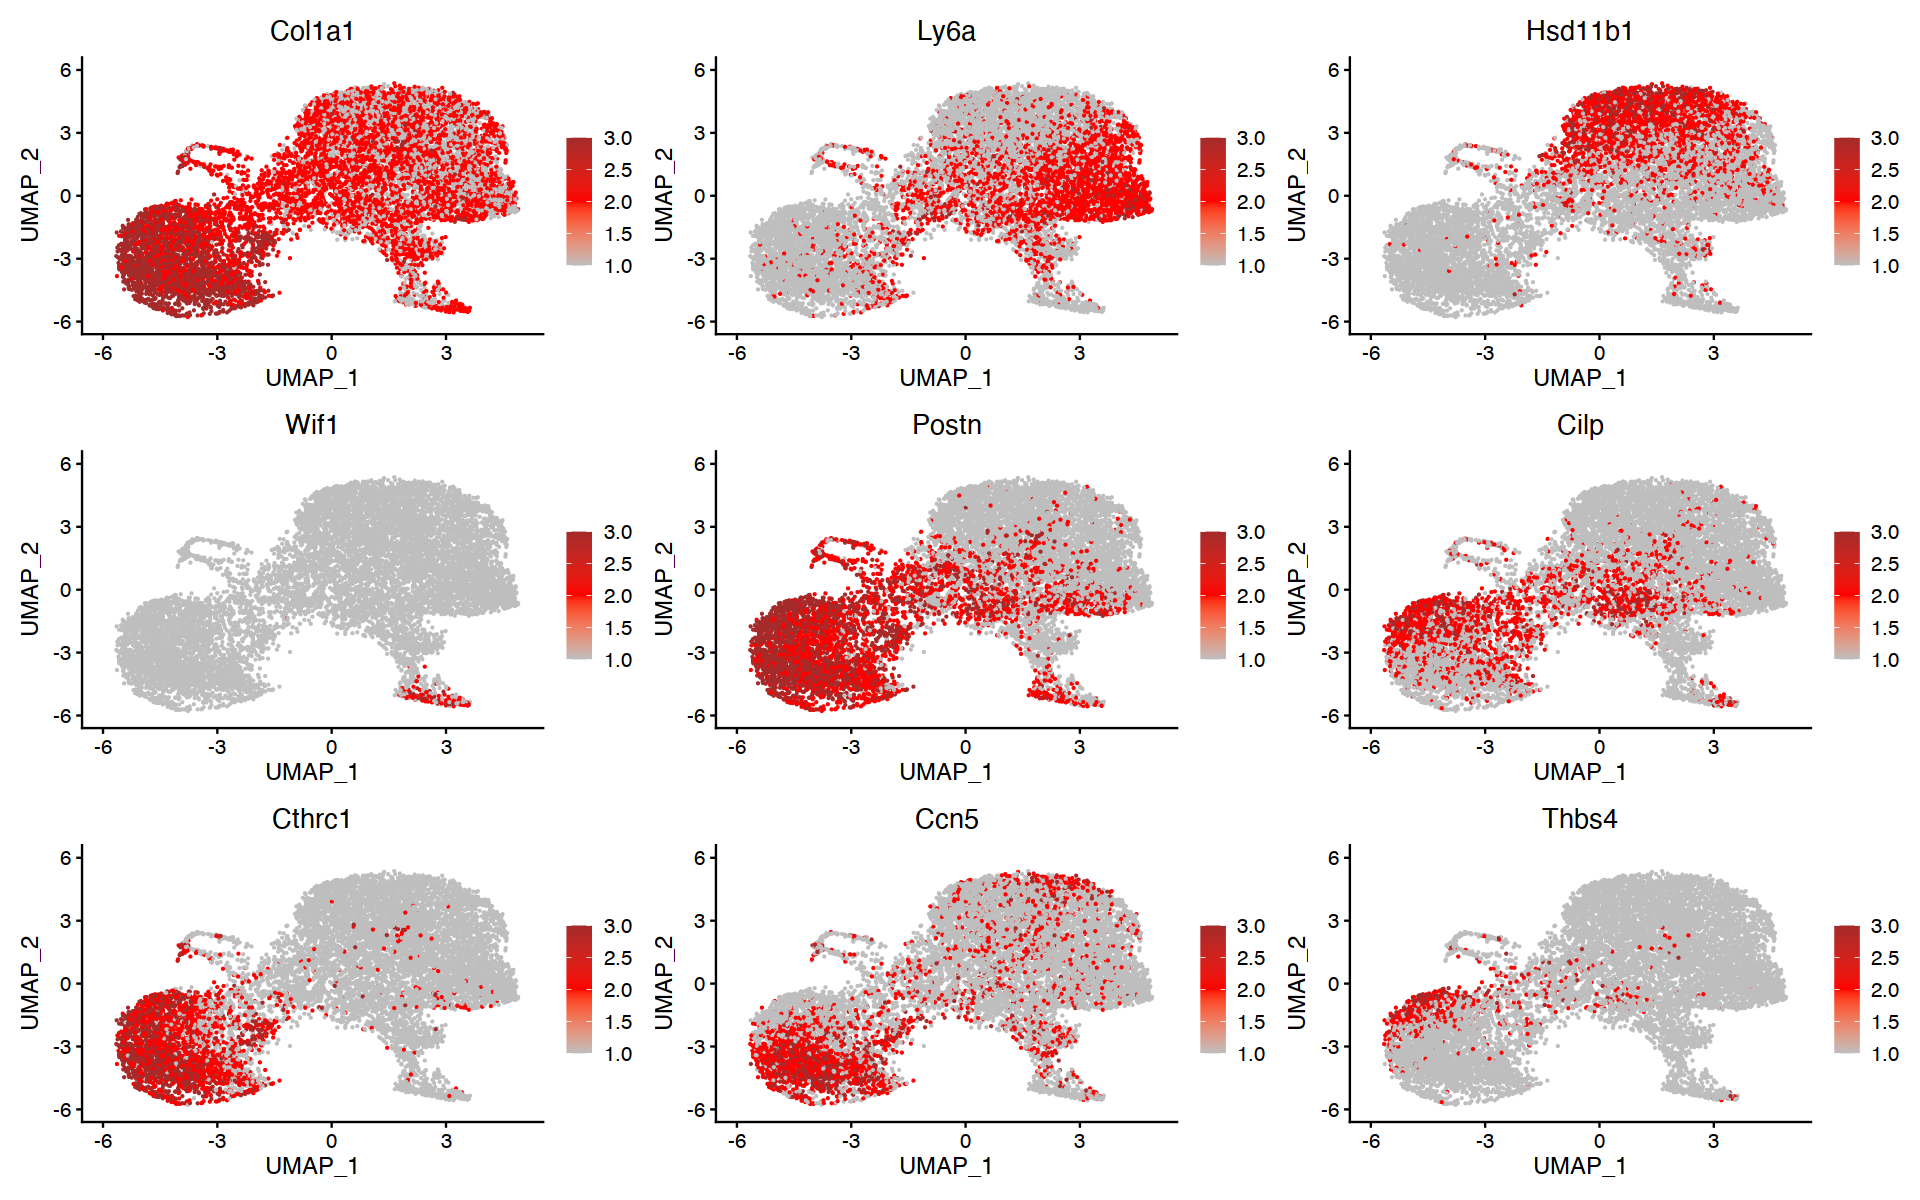

In [13]:
options(repr.plot.width=16, repr.plot.height=10)
FeaturePlot(genes.seurat, c("Col1a1", "Ly6a", "Hsd11b1", "Wif1",
                            "Postn", "Cilp", "Cthrc1", "Ccn5", "Thbs4"),
            cols = c("grey", "red", "brown"))

# Session information

In [14]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_AU.UTF-8/en_AU.UTF-8/en_AU.UTF-8/C/en_AU.UTF-8/en_AU.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1      Matrix_1.3-4       dplyr_1.0.7        plyr_1.8.6        
[5] SeuratObject_4.0.2 Seurat_4.0.3       ggplot2_3.3.5     

loaded via a namespace (and not attached):
  [1] nlme_3.1-152          spatstat.sparse_2.0-0 matrixStats_0.60.0   
  [4] RcppAnnoy_0.0.19      RColorBrewer_1.1-2    httr_1.4.2           
  [7] repr_1.1.3            sctransform_0.3.2     tools_4.1.0          
 [10] utf8_1.2.2            R6_2.5.0              irlba_2.3.3          
 [13] rpart_4.1-15          